# Olympics Tokyo 2021 - Data Analysis and Visualization
This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021 (2020) Tokyo Olympics.
This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install xlrd 
!pip install openpyxl

In [4]:
df_gender = pd.read_excel('EntriesGender.xlsx')
df_team = pd.read_excel('Teams.xlsx')
df_athlete = pd.read_excel('Athletes.xlsx')
df_coaches = pd.read_excel('Coaches.xlsx')
df_medals = pd.read_excel('Medals.xlsx')

C:\Users\lenovo\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Medal Data Analysis

In [5]:
df_medals.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


<AxesSubplot:xlabel='Bronze', ylabel='Count'>

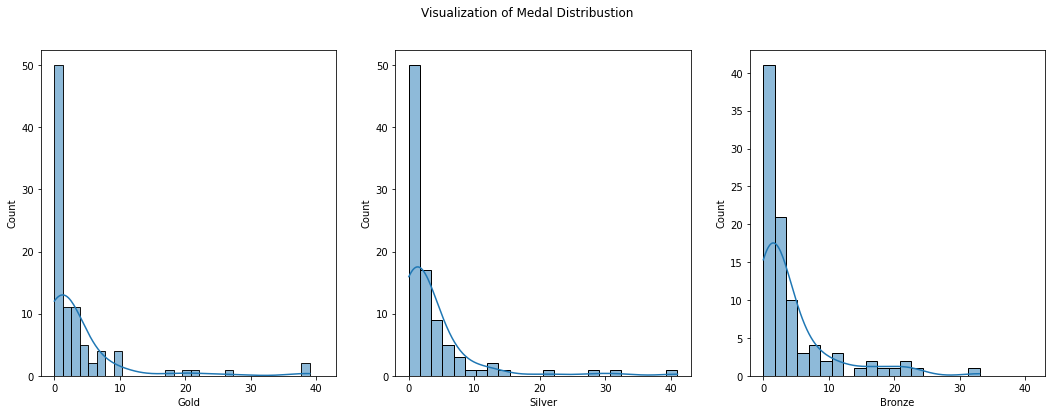

In [6]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(18,6))
figure.suptitle('Visualization of Medal Distribustion')
sns.histplot(df_medals['Gold'] , kde=True,ax=axes[0])
sns.histplot(df_medals['Silver'] , kde=True,ax=axes[1])
sns.histplot(df_medals['Bronze'] , kde=True,ax=axes[2])

<AxesSubplot:xlabel='Bronze', ylabel='Team/NOC'>

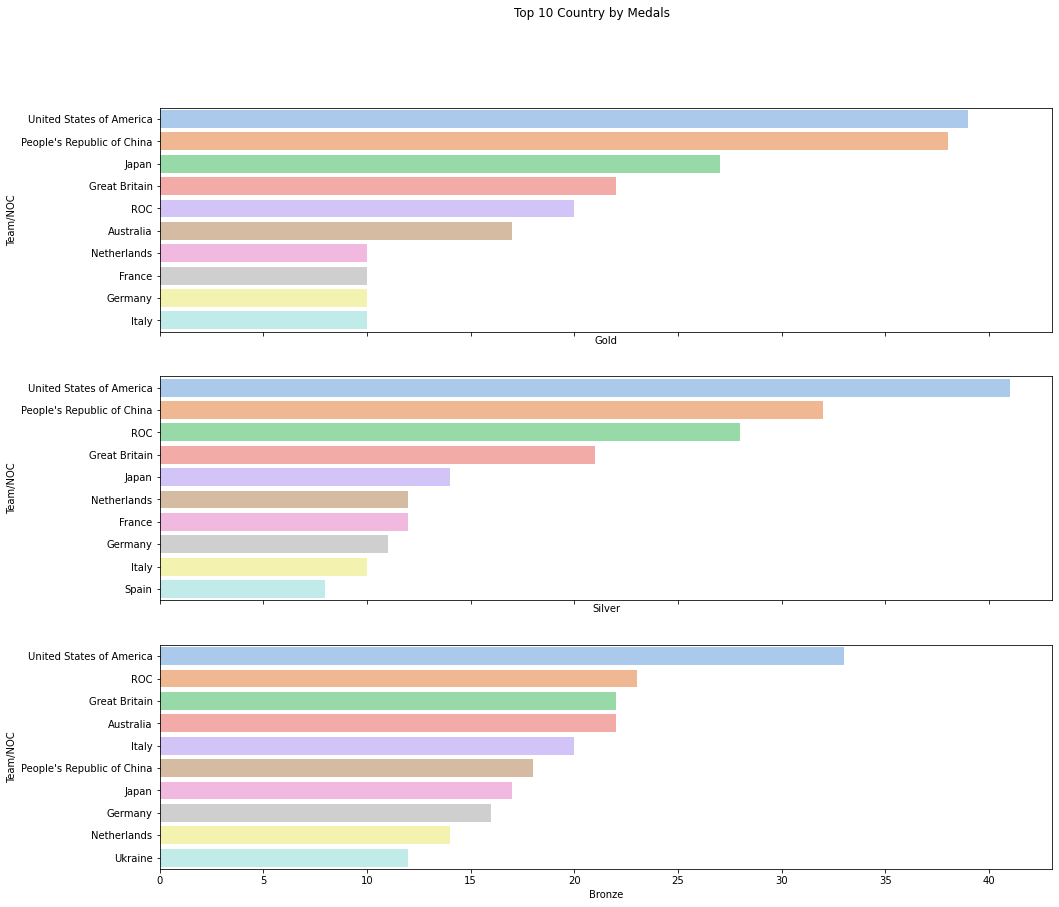

In [7]:
figure, axes = plt.subplots(3, 1, sharex=True, figsize=(16,14))
figure.suptitle('Top 10 Country by Medals')
sns.barplot(y='Team/NOC', 
            x='Gold', 
            data=df_medals.sort_values('Gold',ascending = False)[:10],
            palette='pastel',
            ax=axes[0]
           )
sns.barplot(y='Team/NOC', 
            x='Silver', 
            data=df_medals.sort_values('Silver',ascending = False)[:10],
            palette='pastel',
            ax=axes[1]
           )
sns.barplot(y='Team/NOC', 
            x='Bronze', 
            data=df_medals.sort_values('Bronze',ascending = False)[:10],
            palette='pastel',
            ax=axes[2]
           )

# Gender Data Analysis

In [8]:
df_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


<AxesSubplot:xlabel='Total', ylabel='Count'>

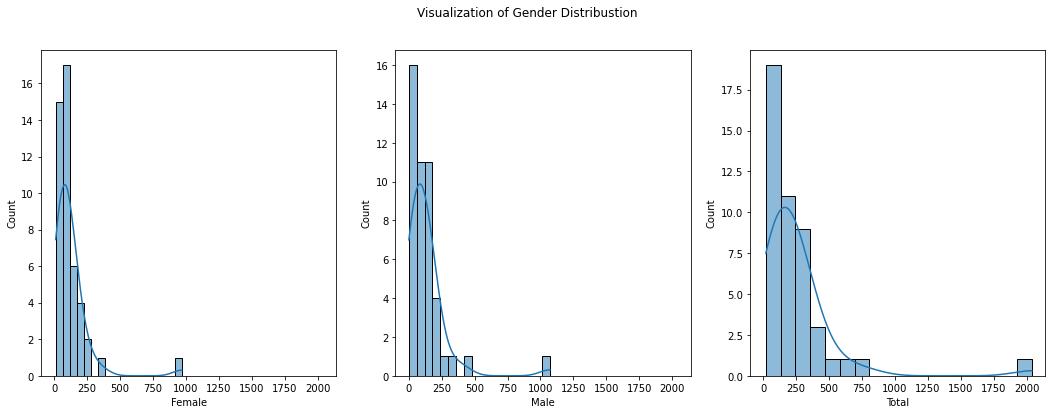

In [9]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(18,6))
figure.suptitle('Visualization of Gender Distribustion')
sns.histplot(df_gender['Female'] , kde=True,ax=axes[0])
sns.histplot(df_gender['Male'] , kde=True,ax=axes[1])
sns.histplot(df_gender['Total'] , kde=True,ax=axes[2])

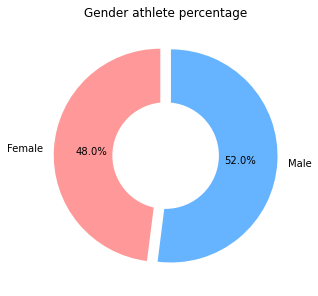

In [10]:
colors = ['#ff9999','#66b3ff']
labels = ['Female', 'Male']
values = [df_gender['Female'].sum(), df_gender['Male'].sum()]
explode = (0.05,0.05)
 
plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.65, explode = explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Gender athlete percentage")
plt.show()

<AxesSubplot:xlabel='Female', ylabel='Discipline'>

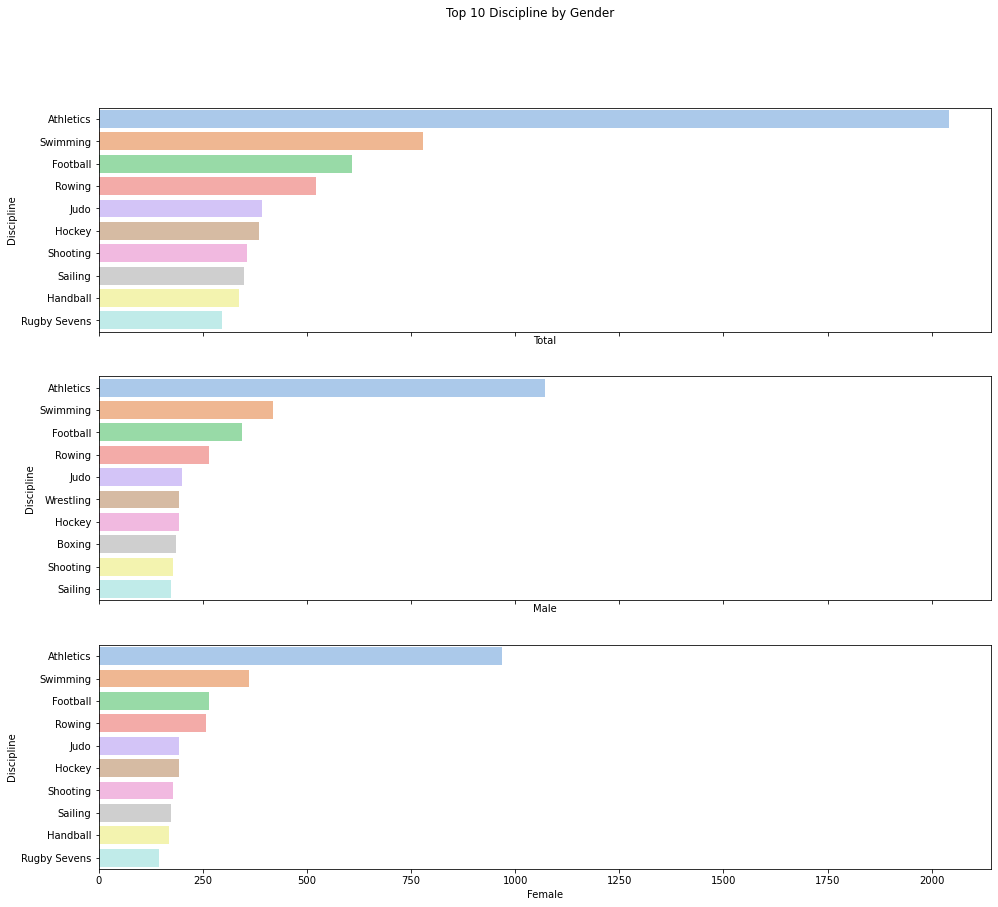

In [11]:
figure, axes = plt.subplots(3, 1, sharex=True, figsize=(16,14))
figure.suptitle('Top 10 Discipline by Gender')
sns.barplot(y='Discipline', 
            x='Total', 
            data=df_gender.sort_values('Total',ascending = False)[:10],
            palette='pastel',
            ax=axes[0]
           )
sns.barplot(y='Discipline', 
            x='Male', 
            data=df_gender.sort_values('Male',ascending = False)[:10],
            palette='pastel',
            ax=axes[1]
           )
sns.barplot(y='Discipline', 
            x='Female', 
            data=df_gender.sort_values('Female',ascending = False)[:10],
            palette='pastel',
            ax=axes[2]
           )

# Teams Data Analysis

In [12]:
df_team.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


<AxesSubplot:title={'center':'Top 10 country with most teams'}, xlabel='Name', ylabel='count'>

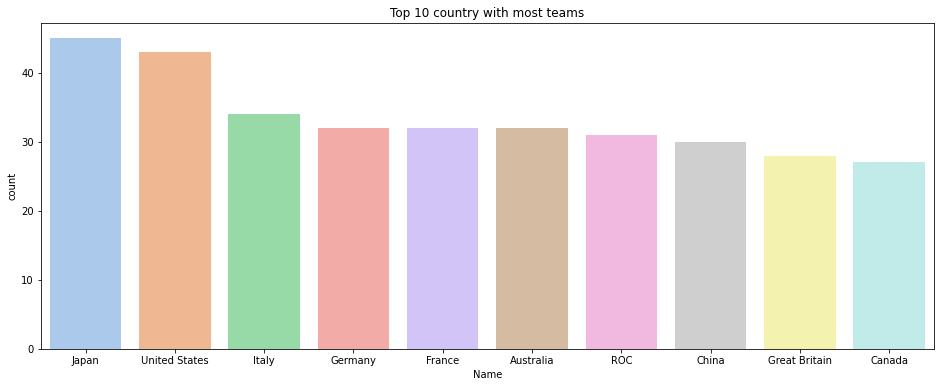

In [13]:
plt.figure(figsize=(16,6))
plt.title('Top 10 country with most teams')
sns.countplot(x='Name',data=df_team,palette='pastel', order=df_team['Name'].value_counts().iloc[:10].index)

<AxesSubplot:title={'center':'Top 10 discipline with most teams'}, xlabel='Discipline', ylabel='count'>

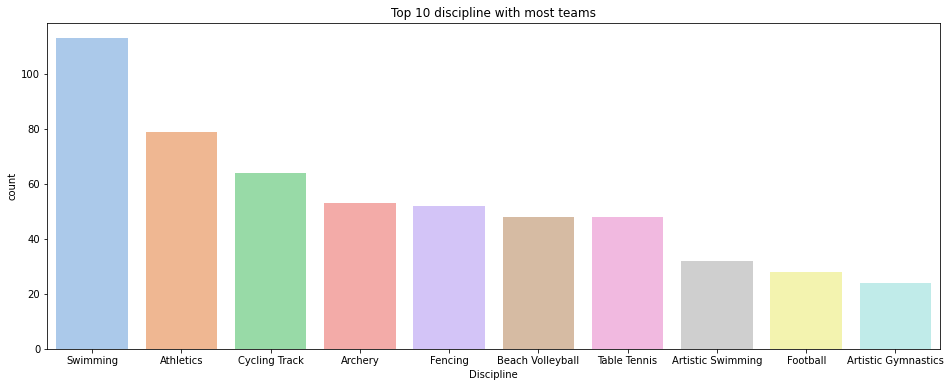

In [14]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most teams')
sns.countplot(x='Discipline',data=df_team,palette='pastel', order=df_team['Discipline'].value_counts().iloc[:10].index)

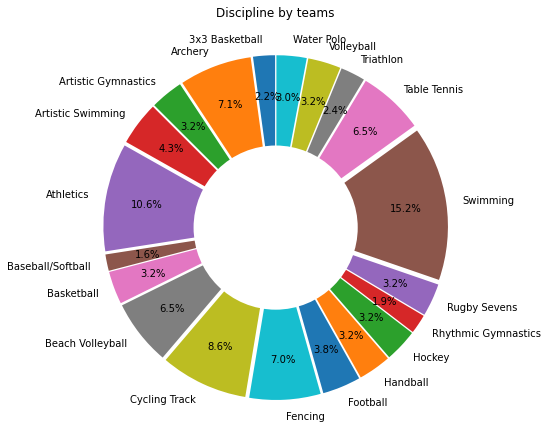

In [15]:
teams_data = df_team.groupby(['Discipline']).count()
teams_data.reset_index(inplace=True)
labels = teams_data['Discipline']
values = teams_data['Name']
explodes = []

for i in range(20):
    explodes.append(0.05)

plt.figure(figsize=(20,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode = explodes)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Discipline by teams")
plt.show()

# Atheltes Data Analysis

In [16]:
df_athlete.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


<AxesSubplot:title={'center':'Top 10 discipline with most Atheltes'}, xlabel='count', ylabel='NOC'>

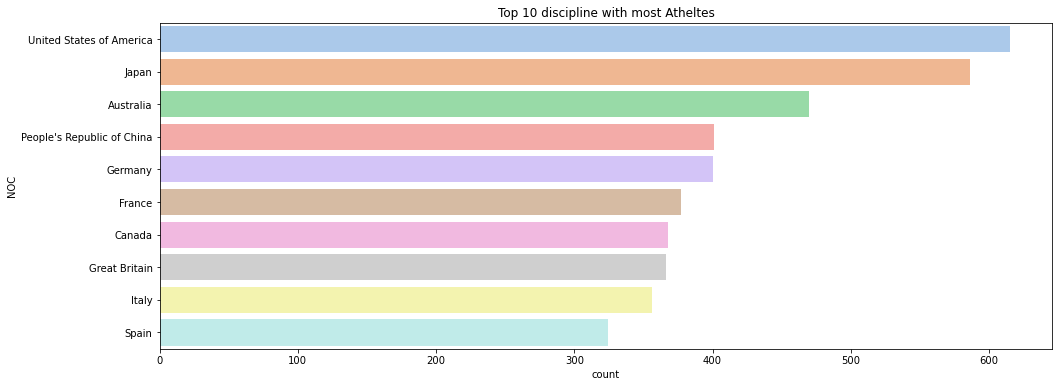

In [17]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most Atheltes')
sns.countplot(y='NOC',data=df_athlete,palette='pastel', order=df_athlete['NOC'].value_counts().iloc[:10].index)

<AxesSubplot:title={'center':'Top 10 discipline with most Atheletes'}, xlabel='count', ylabel='Discipline'>

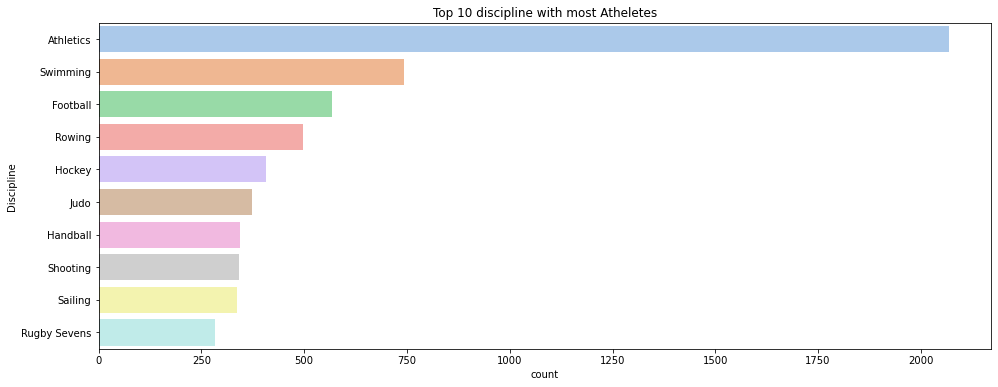

In [18]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most Atheletes')
sns.countplot(y='Discipline',data=df_athlete,palette='pastel', order=df_athlete['Discipline'].value_counts().iloc[:10].index)

# Coaches Data Analysis

In [19]:
df_coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


<AxesSubplot:title={'center':'Top 10 discipline with most Coaches'}, xlabel='count', ylabel='Discipline'>

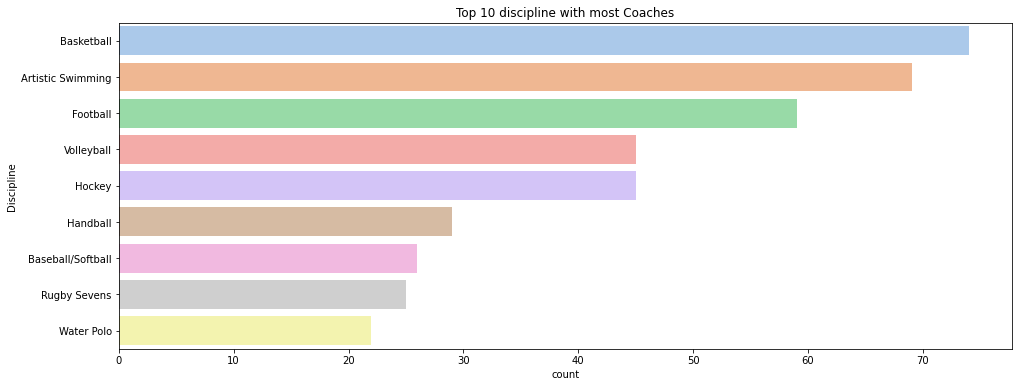

In [20]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most Coaches')
sns.countplot(y='Discipline',data=df_coaches,palette='pastel', order=df_coaches['Discipline'].value_counts().iloc[:10].index)